# Promotional Model for Forecasting

## Data Description

In this dataset you can find the below columns:
account_id, product_id, MAG, AG, date_id, promo_flag, promo_discount_perc, base_demand, ordered_units

In this sample there is only one account,

MAG:highest product hierarchy level 

AG:next highest prodct level

product id: SKU that the model should be able to predict the final order_units for it

So,  MAG-> AG -> product_id is the product hierarchy

date_id: an integer represents a day in a week,

promo_flag: indicates when a promotion was reported, 

promo_discount_perc: the promotion percentage calculated from the sales price,

base_demand: represents the product demand in the absence of any promotion, 

ordered_units: final forecast for the model to generate.

##### CODE (for Model Selection, by running Model Validation on 'base_promo_trainset.csv'):

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
# Importing the dataset
dataset = pd.read_csv('base_promo_trainset.csv')
X = dataset.iloc[:, 5:8].values
y = dataset.iloc[:, 8].values

In [20]:
print(dataset.head(5))

   account_id  product_id  MAG   AG  date_id  promo_flag  promo_discount_perc  \
0           1           9  E01  638      738           0             0.000000   
1           1          10  E01  638      738           0             0.000000   
2           1          10  E01  638      745           0             0.000000   
3           1          10  E01  638      752           0             5.031578   
4           1          10  E01  638      759           0             3.331446   

   base_demand  ordered_units  
0         18.0             89  
1         97.0             97  
2        271.0            271  
3        120.0            120  
4         64.0             64  


In [25]:
print(dataset.describe())

# Rajeev: visualize the unique classes on each of variables.
print('\n Visualize the unique classes on each of variables')
print('MAG: '+str(np.unique(dataset['MAG'])))
print('AG: '+str(np.unique(dataset['AG'])))
print('product_id: '+str(np.unique(dataset['product_id'])))
print('account_id: '+str(np.unique(dataset['account_id'])))

       account_id    product_id            AG       date_id    promo_flag  \
count     15347.0  15347.000000  15347.000000  15347.000000  15347.000000   
mean          1.0   2846.052388   4151.085750   1119.672640      0.234313   
std           0.0   1678.818820   2602.233166    221.784145      0.423582   
min           1.0      9.000000    620.000000    738.000000      0.000000   
25%           1.0    609.000000   3010.000000    927.000000      0.000000   
50%           1.0   3739.000000   3157.000000   1123.000000      0.000000   
75%           1.0   3944.000000   7160.000000   1312.000000      0.000000   
max           1.0   5073.000000   8958.000000   1494.000000      1.000000   

       promo_discount_perc   base_demand  ordered_units  
count         15347.000000  15347.000000   15347.000000  
mean              4.884157    241.435670     303.245129  
std              10.138480    655.944153     916.858783  
min             -57.989063      0.000000   -1917.000000  
25%             

In [22]:
#print(dataset.isnull()) Rajeev: commented this line since in a long dataframe we cant actually see 
# which is True and which is False. Below line should print NaN values
print(dataset[dataset.isnull().any(axis=1)])

Empty DataFrame
Columns: [account_id, product_id, MAG, AG, date_id, promo_flag, promo_discount_perc, base_demand, ordered_units]
Index: []


Since we can observe there are no missing values in the given dataset, we can skip using Imputer funtion to fill out the same.

In [6]:
# Taking care of missing data

#from sklearn.preprocessing import Imputer
#imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
#imputer = imputer.fit(X[:, 5:8])
#X[:, 5:8] = imputer.transform(X[:, 5:8])


In [7]:
# Splitting the data into the Training set and Test set from the training dataset file for model selection

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [8]:
# Feature Scaling (Not required in Random Forest case)

#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
#X_train = sc_X.fit_transform(X_train)
#X_test = sc_X.transform(X_test)
#sc_y = StandardScaler()
#y_train = sc_y.fit_transform(y_train.reshape(-1,1))


In [9]:
# Fitting Decision Tree Regression to the dataset

#from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10, random_state = 0)
#regressor_1 = RandomForestRegressor(n_estimators=10, random_state = 0)
#regressor = cross_val_score(regressor_1, X_train, y_train, cv =10)

regressor.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [10]:
#Predicting new results
y_pred = regressor.predict(X_test)

In [11]:
# Calculating r-squared using metrics class from sklearn

from sklearn import metrics
print(metrics.r2_score(y_test,y_pred))

0.7489094805487418


In [12]:
#print("RSquare: %0.2f (+/- %0.2f)" % (regressor.mean(), regressor.std() * 2))

In [13]:
#calculating average absolute error 
error = abs(y_pred - y_test)
print(error.mean())
print(error.std())


86.90427215496663
397.7570209229776


In [14]:
#Calculating the stats metrices having p value, r-squared and adjusted r-sqaurd values
import statsmodels.api as sm
X = np.append(arr = np.ones((15347,1)).astype(int), values= X, axis = 1 )
X_opt = X[:, [0,1,2,3]]
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
print(regressor_OLS.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                 1.118e+04
Date:                Sat, 30 Nov 2019   Prob (F-statistic):               0.00
Time:                        10:47:47   Log-Likelihood:            -1.1756e+05
No. Observations:               15347   AIC:                         2.351e+05
Df Residuals:                   15343   BIC:                         2.352e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -28.3395      4.930     -5.749      0.0

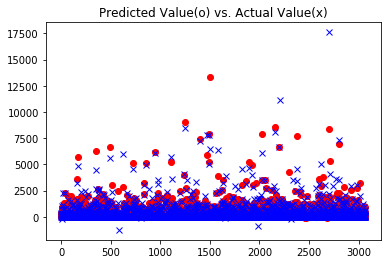

In [15]:
#plotting the actual and predicted value
plt.plot(y_pred, 'o', color = 'red')
plt.plot(y_test, 'x', color= 'blue')
plt.title('Predicted Value(o) vs. Actual Value(x)')
plt.show()

##### CODE (for Prediction on given Test dataset):

In [16]:
# Importing the dataset
dataset_train = pd.read_csv('base_promo_trainset.csv')
X_train = dataset_train.iloc[:, 5:8].values
y_train = dataset_train.iloc[:, 8].values

dataset_test = pd.read_csv('base_promo_testset.csv')
X_test = dataset_test.iloc[:, 5:8].values
#y_test = dataset_test.iloc[:, 8].values

In [17]:
print(dataset_test.head(5))

   account_id  product_id  MAG   AG  date_id  promo_flag  promo_discount_perc  \
0           1          10  E01  638     1501           0             0.000000   
1           1          10  E01  638     1508           0             0.000000   
2           1          10  E01  638     1515           0             0.000000   
3           1          13  E01  638     1501           0             0.088674   
4           1          13  E01  638     1508           0             0.088674   

   base_demand  ordered_units  
0          0.0            NaN  
1          0.0            NaN  
2          0.0            NaN  
3          4.0            NaN  
4          0.0            NaN  


In [18]:
print(dataset_test.describe())

       account_id   product_id           AG      date_id  promo_flag  \
count       542.0   542.000000   542.000000   542.000000  542.000000   
mean          1.0  2836.822878  4175.957565  1510.673432    0.081181   
std           0.0  1702.934145  2630.693350     7.529510    0.273365   
min           1.0     9.000000   620.000000  1501.000000    0.000000   
25%           1.0   296.000000  3010.000000  1501.000000    0.000000   
50%           1.0  3745.000000  3157.000000  1508.000000    0.000000   
75%           1.0  3952.500000  7160.000000  1515.000000    0.000000   
max           1.0  5073.000000  8958.000000  1522.000000    1.000000   

       promo_discount_perc  base_demand  ordered_units  
count           542.000000   542.000000            0.0  
mean              2.892223   264.342979            NaN  
std               9.539602   843.806447            NaN  
min               0.000000     0.000000            NaN  
25%               0.000000     0.000000            NaN  
50%      

In [19]:
print(dataset_test.isnull())

     account_id  product_id    MAG     AG  date_id  promo_flag  \
0         False       False  False  False    False       False   
1         False       False  False  False    False       False   
2         False       False  False  False    False       False   
3         False       False  False  False    False       False   
4         False       False  False  False    False       False   
..          ...         ...    ...    ...      ...         ...   
537       False       False  False  False    False       False   
538       False       False  False  False    False       False   
539       False       False  False  False    False       False   
540       False       False  False  False    False       False   
541       False       False  False  False    False       False   

     promo_discount_perc  base_demand  ordered_units  
0                  False        False           True  
1                  False        False           True  
2                  False        False     

In [20]:
# Fitting Decision Tree Regression to the dataset

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [21]:
#Predicting a new result

y_pred = regressor.predict(X_test)


In [22]:
#Calculating the OLS summary

#import statsmodels.api as sm
#X_train = np.append(arr = np.ones((15347,1)).astype(int), values= X_train, axis = 1 )
#X_opt = X_train[:, [0,1,2,3]]
#regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
#print(regressor_OLS.summary())

In [23]:
# Rounding off the Predicted ordered units to nearest integer

y_round = [round(x) for x in y_pred]

In [27]:
# And finally writing the predicted ordered unit into the test dataset file

datafile = pd.read_csv('base_promo_testset.csv')
datafile['ordered_units'] = y_round
datafile.to_csv('base_promo_testset_pred.csv')